<a href="https://colab.research.google.com/github/jncln/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [2]:
df = pd.read_excel("personality.xlsx")

1. Display the summary of all the features of the dataset using `.info()`

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         49 non-null     object
 1   Post/Share Frequently?       49 non-null     int64 
 2   Active in social media?      49 non-null     int64 
 3   Replies to comments?         49 non-null     int64 
 4   Number of friends/followers  49 non-null     int64 
 5   Personality                  49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [4]:
df.value_counts()

,,,,,,count
Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,
aaron,1,0,1,345,1,1
jardie,0,1,1,278,1,1
jericho,1,0,1,145,1,1
john,1,1,1,197,1,1
joseph,0,1,1,698,1,1
julianne,1,1,1,999,1,1
jv,1,1,1,456,1,1
kamira,1,1,1,540,1,1
leureese,1,1,1,700,1,1


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [5]:
X = df.drop(columns=['Name','Personality']).values

In [6]:
X

array([[  1,   1,   1, 444],
       [  0,   1,   1, 222],
       [  1,   1,   1, 777],
       [  0,   1,   1, 333],
       [  1,   1,   1, 457],
       [  0,   1,   1, 825],
       [  1,   1,   1, 540],
       [  0,   1,   1, 111],
       [  1,   1,   1, 666],
       [  0,   1,   1, 888],
       [  1,   1,   1, 999],
       [  0,   1,   1, 123],
       [  1,   0,   1, 145],
       [  1,   0,   1, 167],
       [  0,   0,   1, 189],
       [  1,   0,   1, 234],
       [  0,   0,   1, 256],
       [  1,   0,   1, 278],
       [  0,   0,   1, 219],
       [  1,   0,   1, 345],
       [  0,   0,   1, 367],
       [  1,   0,   1, 378],
       [  0,   0,   1, 398],
       [  1,   1,   1, 300],
       [  1,   1,   1, 312],
       [  0,   1,   1, 200],
       [  1,   1,   1, 400],
       [  1,   1,   1, 500],
       [  0,   1,   1, 600],
       [  1,   1,   1, 700],
       [  1,   1,   1, 800],
       [  0,   1,   1, 900],
       [  1,   1,   1, 197],
       [  0,   1,   1, 895],
       [  0,  

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [11]:
y = df['Personality'].values

In [12]:

print(y)

[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1]


5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39, 4)
(39,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [15]:
knn = KNeighborsClassifier(n_neighbors=24)

7. Train the model using the `.fit()`

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

8. Test the model using the `.predict()`

In [17]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

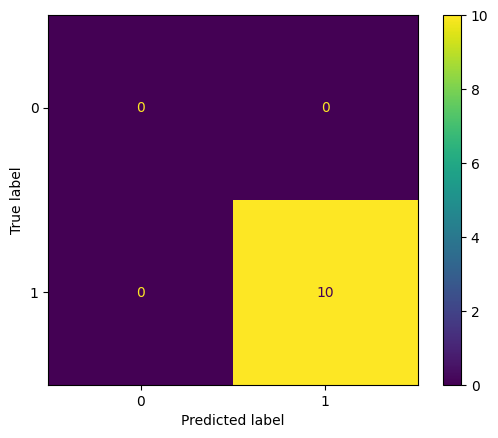

In [19]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

11. Display the precision

In [27]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [1.]


12. Display the recall

In [28]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.]


13. Display the f1-score

In [29]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [1.]


In [31]:
knn.predict([[0,1,0,1000]])

array([1])